# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
columns = ['Exam 1 Score', 'Exam 2 score', 'Result']
dataset = pd.read_csv('./ex2data1.txt', delimiter=',', header=None, names=columns)

## Training/Test set split

In [3]:
dataset['Intercept'] = np.ones((dataset.shape[0],1))
dataset = dataset.reindex(columns=['Intercept']+columns)
#dataset.insert(0,'Intercept',1)

In [4]:
shuffled_dataset = dataset.sample(frac=1)

In [5]:
X_train = shuffled_dataset.iloc[:int(shuffled_dataset.shape[0]*0.7), :3]
y_train = shuffled_dataset.iloc[:int(shuffled_dataset.shape[0]*0.7),[-1]]

X_test = shuffled_dataset.iloc[int(shuffled_dataset.shape[0]*0.7):,:3]
y_test = shuffled_dataset.iloc[int(shuffled_dataset.shape[0]*0.7):,[-1]]

## Plot Data

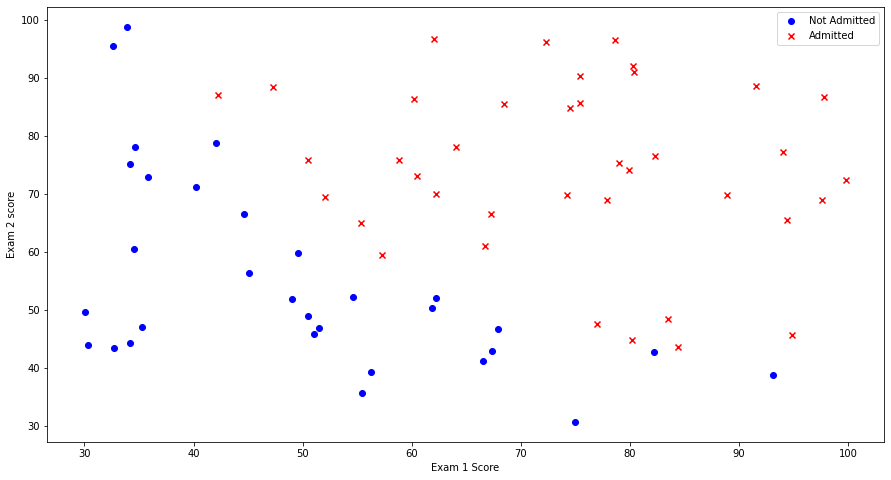

In [6]:
plt.figure(figsize=(15,8))

neg = X_train[y_train.Result == 0]
pos = X_train[y_train.Result == 1]

plt.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Not Admitted')
plt.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Admitted')
plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Logistic Regression Hypotesis

$$\large h_{\theta}(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

$$\large g(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Logistic Regression cost Function (Binary Cross Entropy)

$$ \large J(\theta) = - \frac{1}{m} \sum^{m-1}_{i=0} Loss_i$$
$$ \large Loss_i =\sum_{i = 0}^{m-1} y^{(i)} log(h_{\theta} (x^{(i)})) + (1-y^{(i)}) log(1-h_{\theta}(x^{(i)})) $$

$$ \large J(\theta) = - \frac{1}{m} ((\log(g(X\theta)))^T y + (log(1-g(X\theta)))^T (1-y))$$

In [8]:
def computeCost(theta,X,y):
    m = X.shape[0]
    J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))
    if np.isnan(J[0]):
        return (np.inf)
    return (J[0])

In [9]:
computeCost(np.zeros((X_train.shape[1],1)),X_train.values,y_train.values)

array([0.69314718])

## Gradient Descent

In [10]:
def gradientDescent(X,y, theta = np.zeros((X_train.shape[1],1)), alpha = 0.001, n_iters = 1000):
    theta_gd = np.copy(theta)
    m = X.shape[0]
    J = np.zeros((n_iters,1))
    for i in range(n_iters):
        J[i] = computeCost(theta_gd,X,y)
        h = sigmoid(X.dot(theta_gd))
        theta_gd = theta_gd - (alpha/m)*X.T.dot(h -y)
    return theta_gd,J

In [11]:
theta_gd, J_history = gradientDescent(X_train.values,y_train.values,alpha=0.00001,n_iters=10000)

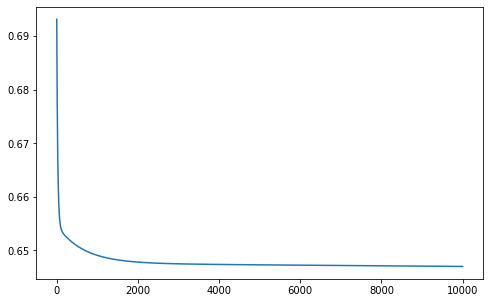

In [12]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(J_history.shape[0]),J_history)
plt.show()

## Advanced Optimization

In [13]:
def gradient(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = - (1/m)*X.T.dot(h-y)
    return (grad.flatten())

In [22]:
from scipy.optimize import minimize
t = np.random.random((X_train.shape[1],1))
res = minimize(computeCost, t, args=(X_train.values,y_train.values), method='BFGS', jac = gradient)

/tmp/ipykernel_9047/3753199262.py:3: RuntimeWarning: divide by zero encountered in log
  J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))
/home/gabry/Dataspell/LogisticRegression/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:141: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/home/gabry/Dataspell/LogisticRegression/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:381: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/tmp/ipykernel_9047/3753199262.py:3: RuntimeWarning: divide by zero encountered in log
  J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))


In [23]:
theta_opt = res.x.reshape(-1,1)

## Plot Decision Boundary

/tmp/ipykernel_9047/3057178192.py:18: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,h.reshape(xx1.shape),[0.5],linewidths=1)


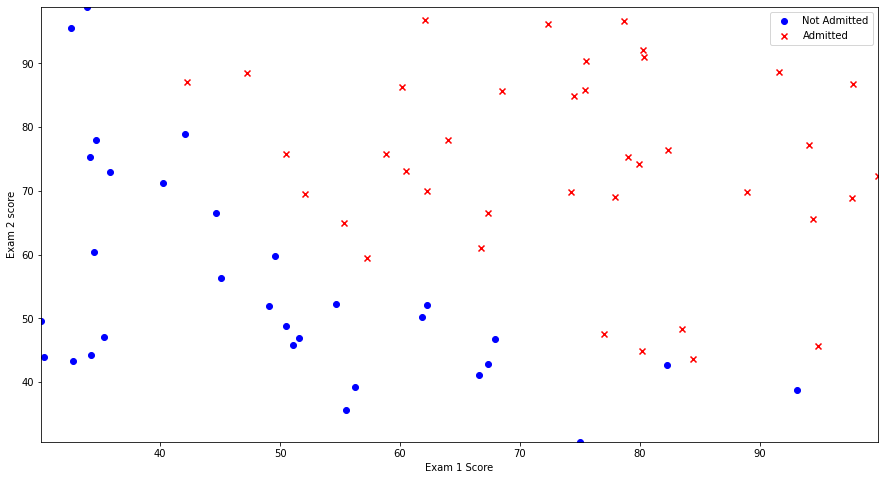

In [24]:
plt.figure(figsize=(15,8))

neg = X_train[y_train.Result == 0]
pos = X_train[y_train.Result == 1]

plt.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Not Admitted')
plt.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Admitted')

x1_min = X_train.iloc[:,1].min()
x1_max = X_train.iloc[:,1].max()
x2_min = X_train.iloc[:,2].min()
x2_max = X_train.iloc[:,2].max()

xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))

h = np.c_[np.ones((xx1.ravel().shape[0],1)),xx1.ravel(),xx2.ravel()].dot(theta_opt)

plt.contour(xx1,xx2,h.reshape(xx1.shape),[0.5],linewidths=1)

plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()